In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
from config import *
from models import Generator, Discriminator, GRelu, JRelu
from torch_datasets import cat_ds, cat_dl, dog_ds, dog_dl
from training import train
from utils import (show_batch, show_img, show_samples, render_samples, 
                   plot_output)

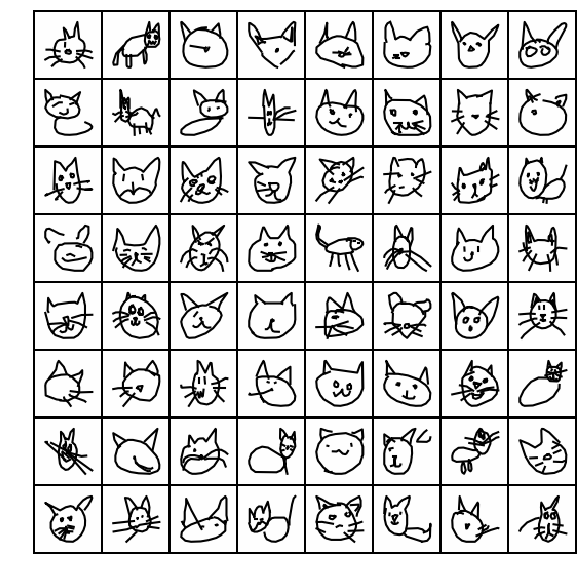

In [5]:
show_batch(cat_dl, fname='cat_batch.png')

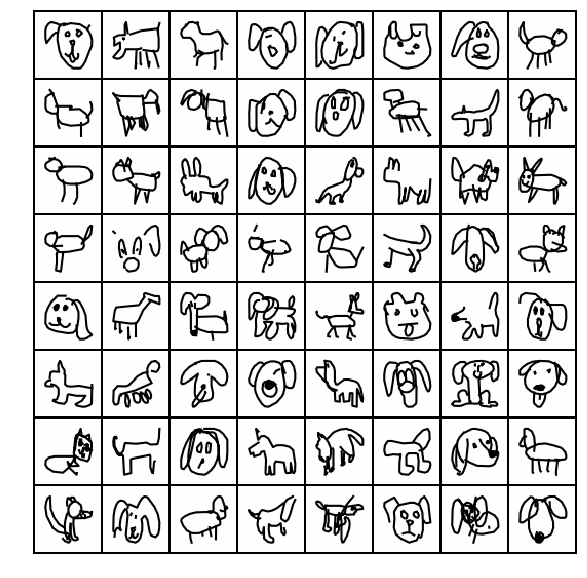

In [6]:
show_batch(dog_dl, fname='dog_batch.png')

## Cats

### v1. 
This used an earlier version of the dataset that normalized images with stats calculated on the dataset. We use a leaky relu with leak 0.2 for both G and D, and train G twice as often as D.

In [19]:
g = Generator(act=GRelu(.2)).to(device)
d = Discriminator().to(device)

output = train(60, cat_dl, sample_dir='cat_samples', sample_freq=5, 
               gd_ratio=2, g=g, d=d)

MovieWriter imagemagick unavailable.


Writing file to quickdraw_samples.gif


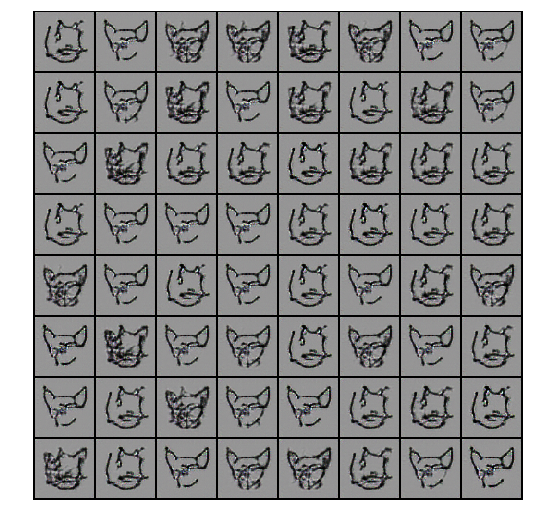

In [20]:
render_samples('cat_samples')

### v2.

The colors of the generated images were not coming out right so I tried normalizing with the standard stats of .5 mean and standard deviation. From this point on experiments were generally run from the command line rather than in Jupyter.

MovieWriter imagemagick unavailable.


Writing file to quickdraw_samples2/quickdraw_samples2.gif


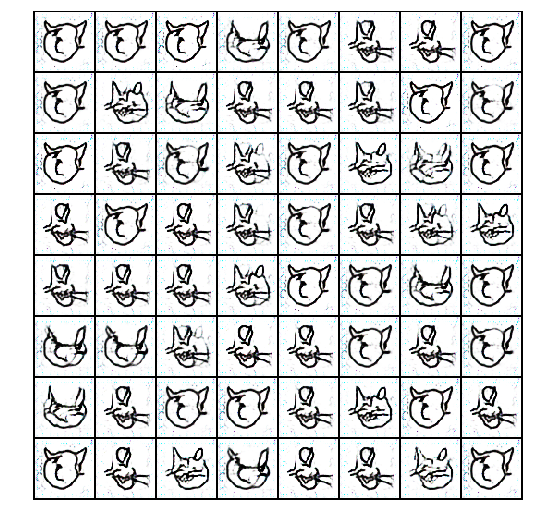

In [7]:
render_samples('cat_samples2')